In [2]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import matplotlib 
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import datasets

In [15]:
def gaussian_sample(mean, sigma, size):
    return np.random.normal(mean, sigma, size)

### Example 1: K-means optimizes for intra-cluster distance
Running the code block below, you will see that in spite of choosing k=3, the algorithm will often assign 2 centroids to what is actually a single cluster. **Consider the differences in the distributions of data below and explain why this phenomenon might be occurring.**

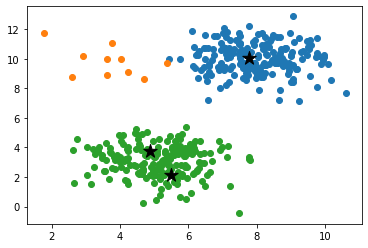

In [26]:
class_1 = gaussian_sample([8, 10], [1, 1], [200, 2])
class_2 = gaussian_sample([3, 10], [1, 1], [10, 2])
class_3 = gaussian_sample([5, 3], [1, 1], [200, 2])
X = np.vstack([class_1, class_2, class_3])
kmeans = KMeans(n_clusters = 3, init = 'random', n_init = 1).fit(X)

plt.scatter(*class_1.T)
plt.scatter(*class_2.T)
plt.scatter(*class_3.T)
plt.scatter(*kmeans.cluster_centers_.T, s = 200, marker = '*', c = 'black')

#### start example-1 answer

#### end example-1 answer

### Example 2: Random Restarts with K-Means
To address the issue in Example 1, we can improve the algorithm's performance by running K-means multiple times with different random initializations. The final chosen clusters will be the one that achieves the smallest cost for the objective function - minimizing the squared sum distances of the data points to the cluster centroids. 

This is easily implemented using the the sklearn KMeans function with the n_init parameter, which defines the number of random restarts that the algorithm will perform. **Set the value for the n_init parameter in the KMeans function below.** 

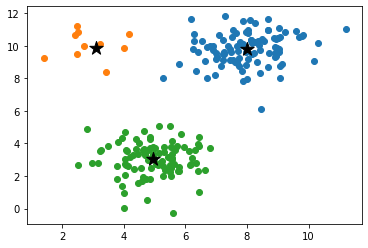

In [18]:
plt.scatter(*class_1.T)
plt.scatter(*class_2.T)
plt.scatter(*class_3.T)
kmeans = KMeans(n_clusters = 3, init = 'random', n_init = ____ ).fit(X) ## TODO: SET THE N_INIT PARAMETER
plt.scatter(*kmeans.cluster_centers_.T, s = 200, marker = '*', c = 'black')

### Example 3: Feature lifting with K-means
Below, we will see how K-means performs on circularly separable data. Running K-means on the original data of 2 concentric circles results in the clustering below. In these demos, each of the colors represent how the algorithm separated the data, where the stars denote the centroids of the clusters. 

Running ordinary K-means on the original dataset of (x,y) coordinates results in the clustering below. **Comment on the performance below.**

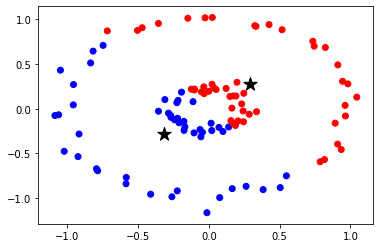

In [28]:
X, Y = datasets.make_circles(noise = 0.05, factor = 0.25)
kmeans = KMeans(n_clusters = 2, init = 'random').fit(X)
predictions = kmeans.predict(X)
colors = ['red', 'blue']
plt.scatter(*X.T, c = predictions, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(*kmeans.cluster_centers_.T, s = 200, marker = '*', c = 'black')

#### start example-3,1 answer

#### end example-3,1 answer

#### Ordinary Polynomial Feature Augmentation 
As we've seen with regression techniques, we can try lifting the feature space. In this case, a natural thought might be to lift the feature space using the radius-squared feature (summing the squares of the coordinates). **Comment on the performance of this strategy below and why this might result.**

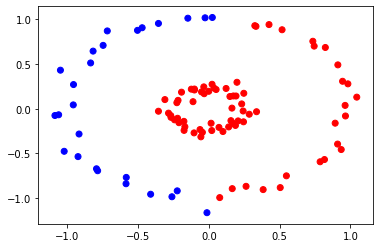

In [29]:
X_aug = np.hstack([X, np.sum(X ** 2, axis = 1).reshape(100,1)])
kmeans_lifted = KMeans(n_clusters = 2).fit(X_aug)
predictions = kmeans_lifted.predict(X_aug)
colors = ['red', 'blue']
plt.scatter(*X.T, c = predictions, cmap=matplotlib.colors.ListedColormap(colors))

#### start example-3,2 answer

#### end example-3,2 answer

#### Manually selecting an appropriate feature
Looking at the feature set above, the radius-squared feature is what would actually help us differentiate between the clusters. Let us try running K-means again using only the radius-squared feature. **Comment on the performance of this strategy below and why this might result.**

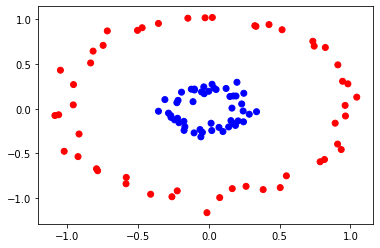

In [30]:
X_aug = np.sum(X ** 2, axis = 1)
kmeans_lifted = KMeans(n_clusters = 2).fit(X_aug.reshape(-1,1))
predictions = kmeans_lifted.predict(X_aug.reshape(-1,1))
colors = ['red', 'blue']
plt.scatter(*X.T, c = predictions, cmap=matplotlib.colors.ListedColormap(colors))

#### start example-3,3 answer

#### end example-3,3 answer

#### Using Kernel PCA to lift & reduce the dimensionality
We cannot always manually construct and select the feature that will help separate the data. In this case, we will use KernelPCA with the RBF Kernel. This allows us to perform non-linear dimensionality reduction. We can then run KMeans in this reduced space to cluster the data.

The first graph shows the projection of data points into 2-D PCA space. The second graph visualizes how the original data points were clustered using the PCA + K-means strategy. **Comment on the results of this strategy.**

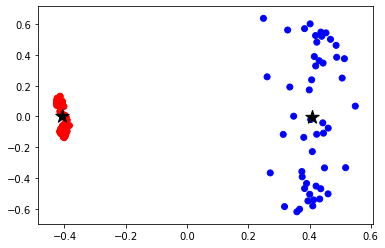

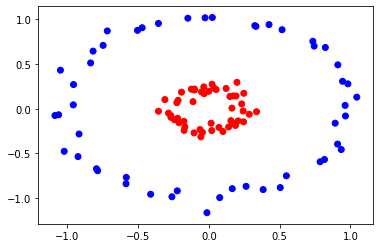

In [31]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 5)
projected_data = kpca.fit_transform(X)
plt.scatter(*projected_data.T, c = Y, cmap=matplotlib.colors.ListedColormap(colors))

kmeans_pca = KMeans(n_clusters = 2).fit(projected_data)
predictions = kmeans_pca.predict(projected_data)
plt.scatter(*kmeans_pca.cluster_centers_.T, s = 200, marker = '*', c = 'black')
plt.show()

colors = ['red', 'blue']
plt.scatter(*X.T, c = predictions, cmap=matplotlib.colors.ListedColormap(colors))

#### start example-3,3 answer

#### end example-3,3 answer